# Lung X-Ray Database learning - ANN Classification

## Based on two sources
(1) https://www.kaggle.com/tawsifurrahman/covid19-radiography-database  
(2) https://www.kaggle.com/paultimothymooney/chest-xray-pneumonia

### (1) Chest x-ray (256x256) images of:   
    - 3616 covid positive patients  
    - 10.192 "normal" (healthy) patients   
    - 6012 Lung Opacity (Non-COVID lung infection)  
    - 1345 Viral Pneumonia  
### (2) Chest x-ray images (varying sizes in groups of test/train/validation) of:  
    - 234 + 1341 + 8 "normal" patients  
    - 390 + 3875 + 8 (bacterial/viral) pneumonia patients  
    
(1) 1341 normal patient images have been taken from source (2) (see readme.md.txt for detailed sources of images)

# 1. Data preparation

Both datasets shall be used! 4 Problems exist when attempting to use both datasets.  

### Problem 1:
Group 3 (non-covid) of set (1) does not specify the cause of the infection, whereas set (2) distinguishes between viral and bacterial pneumonia (lung inflamation).  
Two possible versions:  
1. Viral from sets (1) and (2) shall be merged. Bacterial (2) and non-covid (1) shall be merged.  
1. Viral from sets (1) and (2) shall be merged, all bacterial samples (2) will be separated into its own group. non-covid (1) shall be omitted  

As I would prefer to work with known variables, **I will for no go with variant 2**.  

The four categories will therefore be:
1. healthy/normal
1. bacterial pneumonia
1. viral pneumonia
1. COVID-19

###  Problem 2:
Image sizes differ between data sets.  
Set (1) mostly uses normalised sizes of 256x256. Set (2) uses larger, varying sizes.  

**Set (2) and (1) shall be normalised to fit 256x256.**  

### Problem 3:
Only set (2) is split up into training, testing and validation data.  

After resizing and merging of the two datasets, they will be split up into three groups:  
1. training data (~80% of total)  
1. test data (~10% of total)    
1. validation data (~10% of total)  

Whether the total amount of data per category will be balanced will be assessed once the final amount of resized and merged data in each category do exist.

### Problem 4:
Volume of data is possibly too high.  

Images are grayscale 256x256 images => Each image produces 65.536 pieces of input data.  
Since this project is to be finished in effectively less than 14 days, working with that many inputs creates tremendous load for the network.

**Idea: creating or re-training an autoencoder to reduce the amount of input data to three figures per image if possible. Effectively reducing data load by a factor of ~80.**  

### WARNING!
All files from the two sources need to be located in a specific folder for the following code to work!  
There needs to be a "data\" folder where this file is located. The content of the two sources needs to be extracted directly into this "data\" folder!    

The file structure should be:  
- "data\COVID-19_Radiography_Dataset" - for dataset (1)  
- "data\chest-xray\" - for dataset (2)

## Resizing images
Resizing images in set (2)  
Data from original folders (train, test, val) have been manually consolidated into category folders "NORMAL" and "PNEUMONIA" in main dataset folder.

In [1]:
from PIL import Image
import os
import shutil

In [2]:
## resizing images of set(2)

# save input and output paths for resizing
input_set2_normal = os.path.join("data", "chest_xray", "NORMAL")
input_set2_pneu = os.path.join("data", "chest_xray", "PNEUMONIA")
output = os.path.join("data", "chest_xray", "RESIZE") # Working folder for resizing

# create RESIZE folder if it doesn't exist
if not "RESIZE" in os.listdir(os.path.join("data", "chest_xray")):
    os.mkdir(output)

# method to resize all jpeg images in folder "path"
# stores resulting png-files in folder "dir_out" in target destination "path_out"
def resize_jpg(path, path_out, dir_out):
    # create output folder in output destination if not already there
    if not dir_out in os.listdir(path_out):
        os.mkdir(os.path.join(path_out,dir_out))
    # save list of all items in source folder into "dirs"
    dirs = os.listdir(path)

    # iterates over all images in folder. opens image, resizes and saves in target destination as png
    for item in dirs:
        im = Image.open(os.path.join(path, item))
        imResize = im.resize((256,256), Image.ANTIALIAS)
        imResize.save(os.path.join(path_out,dir_out, item[:-5] + '_re.png'), 'PNG', quality=90)


Call resize for folders in dataset (2)

In [3]:
# not executed as normal set is mostly duplicates of data already included in set (1)

#resize_jpg(input_set2_normal, output, "NORMAL")

In [4]:
resize_jpg(input_set2_pneu, output, "PNEUMONIA")

Files in PNEUMONIA folder shall be split up into bacterial and viral data depending on filename

In [5]:
# separate files in PNEUMONIA folder by filename containing "bacteria" or "virus"
# save list of all images in output\"PNEUMONIA"
dirs = os.path.join(output, "PNEUMONIA")

# create destination folders if needed
if not "PNEUMONIA_BAC" in os.listdir(dirs):
            os.mkdir(os.path.join(output, "PNEUMONIA_BAC"))
if not "PNEUMONIA_VIR" in os.listdir(dirs):
            os.mkdir(os.path.join(output, "PNEUMONIA_VIR"))

# iterate over all images in list. moves files into new subfolders depending on name
for item in os.listdir(dirs):
    # move files with "bacteria" in file name
    if "bacteria" in item:
        os.rename(os.path.join(dirs, item), os.path.join(output, "PNEUMONIA_BAC", item))
    #move files with "virus" in file name
    elif "virus" in item:
        os.rename(os.path.join(dirs, item), os.path.join(output, "PNEUMONIA_VIR", item))
        
# checking whether "PNEUMONIA" folder is empty or not
if len(os.listdir(dirs)) == 0:
    # removing "PNEUMONIA" folder
    os.rmdir(dirs)
else:
    # messaging saying folder not empty
    print("Folder is not empty")

Not all data in set (1) has target dimensions of 256 by 256!  

Resizing images in set (1).

In [6]:
# save input and output paths for resizing
output_path_set1 = os.path.join("data", "COVID-19_Radiography_Dataset", "RESIZE")  # Working folder for resizing
# create RESIZE folder if it doesn't exist
if not "RESIZE" in os.listdir(os.path.join("data", "COVID-19_Radiography_Dataset")):
    os.mkdir(output_path_set1)

input_set1_normal = os.path.join("data", "COVID-19_Radiography_Dataset", "Normal")
input_set1_virpneu = os.path.join("data", "COVID-19_Radiography_Dataset", "Viral Pneumonia")
input_set1_covid = os.path.join("data", "COVID-19_Radiography_Dataset", "COVID")

# method to resize all png images in folder "path"
# stores resulting png-files in folder "dir_out" in target destination "path_out" 
def resize_png(path, path_out, dir_out):
    # create output folder in output destination if not already there
    if not dir_out in os.listdir(path_out):
        os.mkdir(os.path.join(path_out,dir_out))
    # save list of all items in source folder into "dirs"
    dirs = os.listdir(path)
    
    # iterates over all images in folder. opens image, resizes and saves in target destination as png
    for item in dirs:
        im = Image.open(os.path.join(path, item))
        imResize = im.resize((256,256), Image.ANTIALIAS)
        imResize.save(os.path.join(path_out,dir_out, item[:-4] + '_re.png'), 'PNG', quality=90)

Call resize function for all folders in dataset (2)  
Each function call will take a few minutes here! Don't worry, this is working as intended!

In [7]:
resize_png(input_set1_normal,output_path_set1,"Normal")

In [8]:
resize_png(input_set1_virpneu,output_path_set1,"Viral Pneumonia")

In [9]:
resize_png(input_set1_covid,output_path_set1,"COVID")

## Merging datasets

In [10]:
# setting up source and destination paths
path_dest = os.path.join("data", "DATASET") # Working folder for merging and splitting 
path_set1 = os.path.join("data", "COVID-19_Radiography_Dataset", "RESIZE")
path_set2 = os.path.join("data", "chest_xray", "RESIZE")

dest_normal = os.path.join(path_dest, "HEALTHY")
dest_bacpneu = os.path.join(path_dest, "BACTERIAL_PNEUMONIA")
dest_virpneu = os.path.join(path_dest,"VIRAL_PNEUMONIA")
dest_covid = os.path.join(path_dest, "COVID19")

src_set1_normal = os.path.join(path_set1, "Normal")
src_set1_virpneu = os.path.join(path_set1, "Viral Pneumonia")
src_set1_covid = os.path.join(path_set1, "COVID")

#src_set2_normal = os.path.join(path_set2, "NORMAL") #won't be moved due to set 1 including all but 242 images in here
src_set2_bacpneu = os.path.join(path_set2, "PNEUMONIA_BAC")
src_set2_virpneu = os.path.join(path_set2, "PNEUMONIA_VIR")

In [11]:
# Creating destination folders
if not "DATASET" in os.listdir("data"):
    os.mkdir(path_dest)
if not "HEALTHY" in os.listdir(path_dest):
    os.mkdir(dest_normal)
if not "BACTERIAL_PNEUMONIA" in os.listdir(path_dest):
    os.mkdir(dest_bacpneu)
if not "VIRAL_PNEUMONIA" in os.listdir(path_dest):
    os.mkdir(dest_virpneu)
if not "COVID19" in os.listdir(path_dest):
    os.mkdir(dest_covid)

Moving data from all source folders defined above into destination folders as unsplit data

In [12]:
# Moving data from source folders to destination folders to be split up in the next step

# NORMAL dataset
for file in os.listdir(src_set1_normal):
    os.rename(os.path.join(src_set1_normal, file), os.path.join(dest_normal, file))

# Bacterial pneumonia dataset
for file in os.listdir(src_set2_bacpneu):
    os.rename(os.path.join(src_set2_bacpneu, file), os.path.join(dest_bacpneu, file))

# viral pneumonia dataset
for file in os.listdir(src_set1_virpneu):
    os.rename(os.path.join(src_set1_virpneu, file), os.path.join(dest_virpneu, file))
for file in os.listdir(src_set2_virpneu):
    os.rename(os.path.join(src_set2_virpneu, file), os.path.join(dest_virpneu, file))

# covid19 dataset
for file in os.listdir(src_set1_covid):
    os.rename(os.path.join(src_set1_covid, file), os.path.join(dest_covid, file))

Delete working folders for resizing

In [13]:
# Delete working folders for resizing

# Delete RESIZE folder and subfolders in dataset 2
# Delete all subfolders if empty
for dirs in os.listdir(output):
    # checking whether subfolder is empty or not
    if len(os.listdir(os.path.join(output,dirs))) == 0:
        # removing subfolder
        os.rmdir(os.path.join(output,dirs))
    else:
        # messaging saying folder not empty
        print(output+dirs+" is not empty")
# Delete RESIZE folder if empty
if len(os.listdir(output)) == 0:
    os.rmdir(output)
else:
    print(output+" is not empty")

In [14]:
# Delete RESIZE folder and subfolders in dataset 1
# Delete all subfolders if empty
for dirs in os.listdir(output_path_set1):
    # checking whether subfolder is empty or not
    if len(os.listdir(os.path.join(output_path_set1,dirs))) == 0:
        # removing subfolder
        os.rmdir(os.path.join(output_path_set1,dirs))
    else:
        # messaging saying folder not empty
        print(output_path_set1+dirs+" is not empty")
# Delete RESIZE folder if empty
if len(os.listdir(output_path_set1)) == 0:
    os.rmdir(output_path_set1)
else:
    print(output_path_set1+" is not empty")

Count elements in new working folder. Correct values for comparison:
- Healthy images: 10192
- Bacterial Pneumonia images: 2780
- Viral Pneumonia images: 2838
- COVID19 images: 3616


In [15]:
# Count elements in folders
n_count = 0
for item in os.listdir(dest_normal):
    n_count +=1

print("Healthy images: " + str(n_count))

b_count = 0
for item in os.listdir(dest_bacpneu):
    b_count +=1

print("Bacterial Pneumonia images: " + str(b_count))

v_count = 0
for item in os.listdir(dest_virpneu):
    v_count +=1

print("Viral Pneumonia images: " + str(v_count))

c_count = 0
for item in os.listdir(dest_covid):
    c_count +=1

print("COVID19 images: " + str(c_count))

## Calculation of possible splits. Not necessary for further code.
# print()
# print("Healthy splits: train(" + str(int(n_count*.8)) + "), test(" + 
#                                      str(int(n_count*.15)) + "), val(" + str(int(n_count*.05)) + ")")
# print("Bacterial splits: train(" + str(int(b_count*.8)) + "), test(" + 
#                                      str(int(b_count*.15)) + "), val(" + str(int(b_count*.05)) + ")")
# print("Viral splits: train(" + str(int(v_count*.8)) + "), test(" + 
#                                      str(int(v_count*.15)) + "), val(" + str(int(v_count*.05)) + ")")
# print("COVID splits: train(" + str(int(c_count*.8)) + "), test(" + 
#                                      str(int(c_count*.15)) + "), val(" + str(int(c_count*.05)) + ")")

Healthy images: 10192
Bacterial Pneumonia images: 2780
Viral Pneumonia images: 2838
COVID19 images: 3616


### Create Datasplits based on percentages set out at the start
training (80%), validation (10%), testing (10%)


In [16]:
from sklearn.model_selection import train_test_split
import random

# creates split values that create 80/10/10 in two splits
val11 = 0.9
val12 = 0.1
val21 = 0.89
val22 = 0.11

Creating lists with filenames to move into split folders later.  
All code works the same as block one, so only one will be commented.  

### Split Normal Dataset

In [17]:
# NORMAL Dataset
# read all data from Dataset folder
all_normal = os.listdir(dest_normal)

# shuffle data in list to randomise output
random.shuffle(all_normal)

# creates lists via train_test_split. data is split twice to create splits for training, testing and validation
# could have been done more cleverly, but this code will do
rest_normal, val_normal = train_test_split(all_normal, train_size=val11, test_size=val12)
train_normal, test_normal = train_test_split(rest_normal, train_size=val21, test_size=val22)

# output final dataset sizes
print("NORMAL")
print("train:" + str(len(train_normal)))
print("test:" + str(len(test_normal)))
print("val:" + str(len(val_normal)))

NORMAL
train:8163
test:1009
val:1020


### Split Bacterial Pneumonia Dataset

In [18]:
# Bacterial Pneumonia

all_bacpneu = os.listdir(dest_bacpneu)
random.shuffle(all_bacpneu)

rest_bacpneu, val_bacpneu = train_test_split(all_bacpneu, train_size=val11, test_size=val12)
train_bacpneu, test_bacpneu = train_test_split(rest_bacpneu, train_size=val21, test_size=val22)

print("PNEUMONIA_BAC")
print("train:" + str(len(train_bacpneu)))
print("test:" + str(len(test_bacpneu)))
print("val:" + str(len(val_bacpneu)))

PNEUMONIA_BAC
train:2226
test:276
val:278


### Split Viral Pneumonia Dataset

In [19]:
# Viral Pneumonia
all_virpneu = os.listdir(dest_virpneu)
random.shuffle(all_virpneu)

rest_virpneu, val_virpneu = train_test_split(all_virpneu, train_size=val11, test_size=val12)
train_virpneu, test_virpneu = train_test_split(rest_virpneu, train_size=val21, test_size=val22)

print("PNEUMONIA_VIR")
print("train:" + str(len(train_virpneu)))
print("test:" + str(len(test_virpneu)))
print("val:" + str(len(val_virpneu)))

PNEUMONIA_VIR
train:2273
test:281
val:284


### Split COVID Dataset

In [20]:
# COVID
all_covid = os.listdir(dest_covid)
random.shuffle(all_covid)

rest_covid, val_covid = train_test_split(all_covid, train_size=val11, test_size=val12)
train_covid, test_covid = train_test_split(rest_covid, train_size=val21, test_size=val22)

print("COVID")
print("train:" + str(len(train_covid)))
print("test:" + str(len(test_covid)))
print("val:" + str(len(val_covid)))

COVID
train:2896
test:358
val:362


In [21]:
# method to split all folders into datasets
# accepts three lists of filenames (train, test, val) of one dataset, a path "source" and a string "dest_str"
# files from lists will be moved from source folder to data\"settype"\"dest_str"
def move_splits(train, test, val, source, dest_str):
#     if not "_SPLITS" in os.listdir(path_dest):
#         os.mkdir(os.path.join(path_dest,"_SPLITS"))
    # create train/test/val folders if not present
    if not "train" in os.listdir("data"):
        os.mkdir(os.path.join("data","train"))
    
    if not "test" in os.listdir("data"):
        os.mkdir(os.path.join("data","test"))
    
    if not "val" in os.listdir("data"):
        os.mkdir(os.path.join("data","val"))
            
    # save all destination paths for training/testing/validation
    train_dir = os.path.join("data","train")
    test_dir = os.path.join("data","test")
    val_dir = os.path.join("data","val")
    
    
    # training set
    # iterate through first list. create "dest_str" folder in subfolder if not present, move files from list to new folder.
    for item in train:
        if not dest_str in os.listdir(train_dir):
            os.mkdir(os.path.join(train_dir,dest_str))
        os.rename(os.path.join(source, item), os.path.join(train_dir, dest_str, item))

    # test set
    # same logic as training
    for item in test:
        if not dest_str in os.listdir(test_dir):
            os.mkdir(os.path.join(test_dir,dest_str))
        os.rename(os.path.join(source, item), os.path.join(test_dir, dest_str, item))

    # validation set
    # same logic as training
    for item in val:
        if not dest_str in os.listdir(val_dir):
            os.mkdir(os.path.join(val_dir,dest_str))
        os.rename(os.path.join(source, item), os.path.join(val_dir, dest_str, item))

In [22]:
move_splits(train_normal, test_normal, val_normal, dest_normal, "HEALTHY")

In [23]:
move_splits(train_bacpneu, test_bacpneu, val_bacpneu, dest_bacpneu, "PNEUMONIA_BAC")

In [24]:
move_splits(train_virpneu, test_virpneu, val_virpneu, dest_virpneu, "PNEUMONIA_VIR")

In [25]:
move_splits(train_covid, test_covid, val_covid, dest_covid, "COVID")

Delete "DATASET" working folder and it's subfolders

In [26]:
# Delete working folder "Dataset". No longer needed.
# Logic works the same as before. comments omited
for dirs in os.listdir(path_dest):
    if len(os.listdir(os.path.join(path_dest,dirs))) == 0:
        os.rmdir(os.path.join(path_dest,dirs))
    else:
        print(path_dest+dirs+" is not empty")
if len(os.listdir(path_dest)) == 0:
    os.rmdir(path_dest)
else:
    print(path_dest+" is not empty")

### Datasets are now split up correctly
The actual dataset will NOT be the exact same every time, as the images are being shuffled before splitting them up. The number of samples is the same, the exact samples are not!  
Datasets will be used in this exact file structure during neural network training and validation.

### Visualisation of datasset

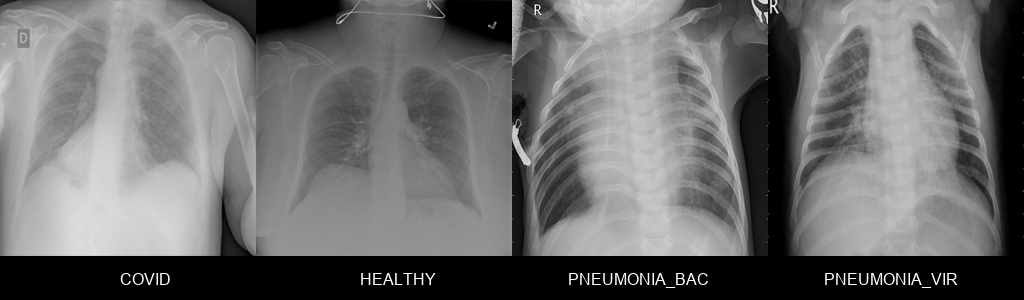

In [27]:
from PIL import Image
from PIL import ImageFont, ImageDraw, ImageOps
from random import randrange

def plot_samples(sample_files):
    x, y = 0, 0
    font_size = 16
    # Size of individual images
    img_size = 256
    # Final Image size
    width = img_size*4
    height = 300
    
    img = Image.new(mode="L", size=(width, height), color=0)
    font = ImageFont.truetype("arial.ttf", font_size)
    draw = ImageDraw.Draw(img)
    
    # Iterate samples
    for file in sample_files:
        # Get image file as PIL Object
        copy_img = Image.open(f"{base_path}{file[0]}/{file[1]}")
        # Paste into final img
        img.paste(copy_img, (x, y))
        # Calculate size of the label
        word_pxl_size = ((len(file[0][:-4]))*font_size)/2
        # Calculate position of the text label relative to the image (aka how to center a div)
        text_position = x + img_size/2 - word_pxl_size
        # Actually draw the text
        draw.text((text_position, 270), file[0], fill='white', font=font)
        # Increase x coordinate before pasting new image
        x += img_size
    
    # Display image in jupyter
    display(img)
    # Save image file
    img.save('lung_sample.png')

sample_files = []
# Read folders from sample_data (COVID, HEALTHY, PNEUMONIA_BAC, PNEUMONIA_VIRAL)
base_path = "data/test/"
for img_category in os.listdir(base_path):
    # Get images from folder
    image_files = os.listdir(f"{base_path}{img_category}/")
    # Select random image file
    image_file = image_files[randrange(len(image_files))]
    # Save image path and category
    sample_files.append([img_category, image_file])

# Generate Sample Images from Data Sample
plot_samples(sample_files)
